# Week 3 - Problem 2, Semiconductor Quality Assurance

This problem is taken from week 3 of the Coursera Machine Learning course by Andrew Ng. The in-class homework solution was originally performed in Octave. This workbook is my additional and alternative method of solving in Python.

Consider the following problem statement:
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## Approach
Part 1) Build out a logistic regression model that uses a combination of non-linear features and vectorized arithmetic to provide predictions on whether or not a chip should be rejected.
Part 2) Same as part 1, but use regularized logistic regression.
Part 3) Use logistic regression classification models in scikit-learn as an alternative to compare our result

In [1]:
# Import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

## Part 1: Logistic Regression Model with non-linear features

Load and visualize the data.

In [2]:
pathToData = './ex2/ex2data2.txt'
data = pd.read_csv(pathToData,names=['Test 1','Test 2','Accept/Reject'])
data['Intercept'] = np.ones(len(data['Accept/Reject'].values))
data.describe()

,Test 1,Test 2,Accept/Reject,Intercept
count,118.000000,118.000000,118.000000,118.0
mean,0.054779,0.183102,0.491525,1.0
std,0.496654,0.519743,0.502060,0.0
min,-0.830070,-0.769740,0.000000,1.0
25%,-0.372120,-0.254385,0.000000,1.0
50%,-0.006336,0.213455,0.000000,1.0
75%,0.478970,0.646562,1.000000,1.0
max,1.070900,1.108900,1.000000,1.0


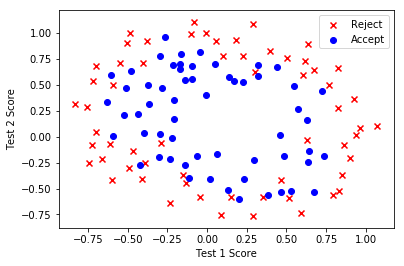

In [3]:
# Visualize the distribution using smart indexing
fig,ax = plt.subplots()
ax.scatter(data['Test 1'][data['Accept/Reject'] == 0],data['Test 2'][data['Accept/Reject'] == 0],color='r',marker='x',label='Reject')
ax.scatter(data['Test 1'][data['Accept/Reject'] == 1],data['Test 2'][data['Accept/Reject'] == 1],color='b',marker='o',label='Accept')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.legend(loc=0)


#### The accept/reject distribution looks more complicated that what a linear set of features could likely resolve. We will now construct non-linear features to fit. These will be constructed by multiplying test 1 with test 2  with various powers up to order 4

In [4]:
# Define our inital feature and target arrays 
X = data[['Intercept','Test 1','Test 2']]
y = data[['Accept/Reject']].values

In [5]:
def create_nonlinear_features(X,features=['Test 1','Test 2']):
    n = 6
    for i in range(1,n+1):
        for j in range(0,i+1):
            if ((i-j) == 1 and j == 0) or ((i-j) == 0 and j == 1):
                continue
            tempStr = 'x^'+str(i-j)+'_y^'+str(j)
            X[tempStr] = data['Test 1']**(i-j)*data['Test 2']**(j)
    return X

In [6]:
X = create_nonlinear_features(X,features=['Test 1','Test 2'])
X.describe()

,Intercept,Test 1,Test 2,x^2_y^0,x^1_y^1,x^0_y^2,x^3_y^0,x^2_y^1,x^1_y^2,x^0_y^3,...,x^2_y^3,x^1_y^4,x^0_y^5,x^6_y^0,x^5_y^1,x^4_y^2,x^3_y^3,x^2_y^4,x^1_y^5,x^0_y^6
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


### Define the sigmoid function, cost function, and gradient decent function

In [7]:
# Using functions defined from problem 1

def sigmoid(z):
    '''
    Function evaluates the value of the sigmoid function
    '''
    return 1.0/(1.0+np.exp(-1.0*z))

def logisitc_cost_function(theta,X,y):
    '''
    Compute cost and gradient for logistic regression
    '''
    m = len(y)
    ## Evaluation of the vectorized form of the logisitic cost function
    term1 = -1*np.transpose(y)*np.log(sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    term2 = -1*(1-np.transpose(y))*np.log(1-sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    J = 1.0/(float(m))*np.sum(term1 + term2)
    
    ## Evaluation of the gradient vector
    grad = (1./float(m))*np.transpose(np.matmul(sigmoid(np.matmul(np.transpose(theta),np.transpose(X)))-np.transpose(y),X))
    
    return J, grad

def gradient_decent(theta,X,y,alpha,num_iter):
    '''
    Gradient decent method for updating theta
    '''
    cost_history = []
    m = float(len(y))
    
    for i in range(num_iter):
        cost,grad = logisitc_cost_function(theta,X,y)
        cost_history.append(cost)
        theta = theta - (alpha/m)*np.matmul(np.transpose(X),sigmoid(np.matmul(X,theta))-y) # vectorized form of the theta update equation
        
    return theta,cost_history

In [8]:
# Lets start with a learning rate, alpha, of 0.01
theta = np.zeros((X.shape[1],1))
alpha = 3.0
n_iterations = 5000
theta,cost_history = gradient_decent(theta,X,y,alpha,n_iterations)

In [9]:
def create_nonlinear_scalars(x,y):
    '''
    Analogous function to generate higher order terms in feature data set for a scalar input, rather than a matrix input
    '''
    n = 6
    z = [1,x,y]
    for i in range(1,n+1):
        for j in range(0,i+1):
            if ((i-j) == 1 and j == 0) or ((i-j) == 0 and j == 1):
                continue
            tempStr = 'x'+str(i-j)+'_y'+str(j)
            z.append(x**(i-j)*y**(j))
    return np.array(z)

Text(0,0.5,'Cost Function')

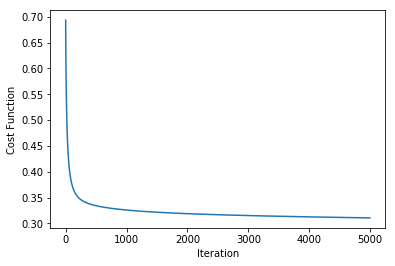

In [10]:
# Plot the cost function history over time - convergence looks fairly well
fig2,ax2 = plt.subplots()
ax2.plot(range(len(cost_history)),cost_history)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost Function')

### Visualize the solution by evaluating $z(x,y) = X^{T}\theta$ at each point in a grid and drawing 

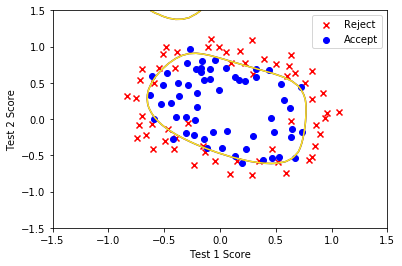

In [11]:
# Create x and y grid of points and init the z values
x_map = np.linspace(-1.5,1.5,50)
y_map = np.linspace(-1.5,1.5,50)
z_map = np.zeros((len(x_map),len(y_map)))
for i,x_val in enumerate(x_map):
    for j,y_val in enumerate(y_map):
        # Evaluate the inner product of the feature vector for a single point and the theta parameter vector for the construction of contour plots
        z_map[j,i] = np.matmul(create_nonlinear_scalars(x_val,y_val),theta)

# plot the z = 0 contour along with the data to visualize the decision boundary fit by the logistic regression method
fig,ax = plt.subplots()
levels = np.array([0,0.01])
ax.contour(x_map,y_map,z_map,levels)
ax.scatter(data['Test 1'][data['Accept/Reject'] == 0],data['Test 2'][data['Accept/Reject'] == 0],color='r',marker='x',label='Reject')
ax.scatter(data['Test 1'][data['Accept/Reject'] == 1],data['Test 2'][data['Accept/Reject'] == 1],color='b',marker='o',label='Accept')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.legend(loc=0)

### The contour decision boundary does a pretty good job of separating accept/reject points. There is a small portion of the contour curve above, which suggests the top-most part of the contour may have overfitted slightly. This motivates part 2 of the exercise which is aimed at implementing regularization to help prevent overfitting.

## Part 2: Logistic Regression Model with Regularization and non-linear features

We now consider adding a regularization term to the end of our cost function. Specifically this is: $\frac{\lambda}{2m} \theta^{T}\theta$

In [14]:
# redefine the functions used in part 1, this time with a regularization term

def sigmoid(z):
    '''
    Function evaluates the value of the sigmoid function
    '''
    return 1.0/(1.0+np.exp(-1.0*z))

def logisitc_cost_function(theta,X,y,lambda_term):
    '''
    Compute cost and gradient for logistic regression
    
    Recall, we do not include the intercept in the regularization
    '''
    m = len(y)
    ## Evaluation of the vectorized form of the logisitic cost function
    term1 = -1*np.transpose(y)*np.log(sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    term2 = -1*(1-np.transpose(y))*np.log(1-sigmoid(np.matmul(np.transpose(theta),np.transpose(X))))
    term3 = lambda_term/(2*float(m))*np.matmul(np.transpose(theta[1:]),theta[1:]) # regularization term
    J = 1.0/(float(m))*np.sum(term1 + term2) + term3
    
    ## Evaluation of the gradient vector
    grad = (1./float(m))*np.transpose(np.matmul(sigmoid(np.matmul(np.transpose(theta),np.transpose(X)))-np.transpose(y),X))
    
    return J, grad

def gradient_decent(theta,X,y,alpha,num_iter,lambda_term):
    '''
    Gradient decent method for updating theta
    '''
    cost_history = []
    m = float(len(y))
    
    for i in range(num_iter):
        cost,grad = logisitc_cost_function(theta,X,y,lambda_term)
        cost_history.append(cost[0])
        theta[0] = theta[0] - np.matmul(np.transpose((alpha/m)*(sigmoid(np.matmul(X,theta))-y)),np.reshape((X.values[:,0]),(len(X.values[:,0]),1)))
        theta[1:] = theta[1:] - alpha*((1/m)*(sigmoid(np.matmul(np.transpose(theta[1:]),np.transpose(X[:,1:])))-y)+(lambda_term/m)*np.matmul(np.transpose(theta[1:]),theta[1:])) # vectorized form of the theta update equation
        theta[0] = theta0
        
    return theta,cost_history

In [15]:
# Lets start with a learning rate, alpha, of 0.01
theta = np.zeros((X.shape[1],1))
alpha = 3.0
n_iterations = 5000
lambda_term = 1
#theta,cost_history = gradient_decent(theta,X,y,alpha,n_iterations,lambda_term)
# This is still a work in progress...

TypeError: unhashable type: 'slice'

Text(0,0.5,'Cost Function')

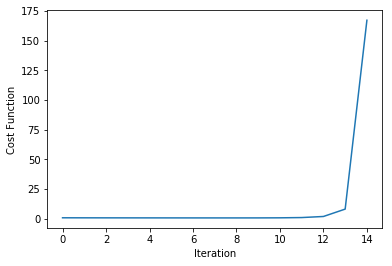

In [79]:
# Plot the cost function history over time - convergence looks fairly well
fig2,ax2 = plt.subplots()
ax2.plot(range(len(cost_history)),cost_history)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost Function')